Fraud Detection in Online payment

In [183]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# loading Data

In [185]:
online=pd.read_csv('D:/data/online_fraud detection.csv')
online

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


# preprocessing the Data

In [187]:
online.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [189]:
online.isFraud.value_counts(),online.isFlaggedFraud.value_counts() # here imbalance dataset present so we will use bootstraping

(isFraud
 0    6354407
 1       8213
 Name: count, dtype: int64,
 isFlaggedFraud
 0    6362604
 1         16
 Name: count, dtype: int64)

In [191]:
online.shape

(6362620, 11)

In [193]:
online.columns=[i.lower() for i in online.columns]
online.columns

Index(['step', 'type', 'amount', 'nameorig', 'oldbalanceorg', 'newbalanceorig',
       'namedest', 'oldbalancedest', 'newbalancedest', 'isfraud',
       'isflaggedfraud'],
      dtype='object')

In [195]:
online.head()

,step,type,amount,nameorig,oldbalanceorg,newbalanceorig,namedest,oldbalancedest,newbalancedest,isfraud,isflaggedfraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [197]:
online.type.value_counts(),online.step.value_counts()

(type
 CASH_OUT    2237500
 PAYMENT     2151495
 CASH_IN     1399284
 TRANSFER     532909
 DEBIT         41432
 Name: count, dtype: int64,
 step
 19     51352
 18     49579
 187    49083
 235    47491
 307    46968
        ...  
 432        4
 706        4
 693        4
 112        2
 662        2
 Name: count, Length: 743, dtype: int64)

In [199]:
online.describe() # here object type not come

,step,amount,oldbalanceorg,newbalanceorig,oldbalancedest,newbalancedest,isfraud,isflaggedfraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [200]:
# checking the missing value 
online.isnull().sum()  # no null value present NaN or Nothing

step              0
type              0
amount            0
nameorig          0
oldbalanceorg     0
newbalanceorig    0
namedest          0
oldbalancedest    0
newbalancedest    0
isfraud           0
isflaggedfraud    0
dtype: int64

In [201]:
# dropping unnecessary columns like nameof origin and name of destination it is the transaction code of banks and it is unique for every bnk and may be till now 
pay=online.drop(labels=['nameorig','namedest'],axis=1)
pay.head()#,pay.shape

,step,type,amount,oldbalanceorg,newbalanceorig,oldbalancedest,newbalancedest,isfraud,isflaggedfraud
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,0
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,1,0
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,0


In [203]:
# checking duplicate value
dup=online.duplicated().sum()
dup1=pay.duplicated().sum()
dup,dup1 # in original data we have no duplicate and hwen we remove the 'nameorig','namedest' then 543 duplicate occurs

(0, 543)

In [206]:
# Here we are checking any zero value present or not in any columns
x=(online['type']==0).sum()
x
# instead of check all  columns  we make a loop
for i in online.columns:
    z=(online[i]==0).sum()
    print('zero in: ',i,z)

zero in:  step 0
zero in:  type 0
zero in:  amount 16
zero in:  nameorig 0
zero in:  oldbalanceorg 2102449
zero in:  newbalanceorig 3609566
zero in:  namedest 0
zero in:  oldbalancedest 2704388
zero in:  newbalancedest 2439433
zero in:  isfraud 6354407
zero in:  isflaggedfraud 6362604


In [213]:
# we will take positive value of amount, because 16 zeros are present so no matter that transaction
online['amount'].shape
online=online[online['amount']>0].copy() # here we make a copy of non zero amount 
online.shape

(6362604, 11)

In [215]:
online.type.value_counts()

type
CASH_OUT    2237484
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64

# EDA-EXPLORATORY DATA ANALYSIS

In [217]:
# we have now one object type  so encode it 
# data['type'] = data['type'].map({'CASH_OUT': 0, 'PAYMENT': 1, 'CASH_IN': 2, 'TRANSFER': 3, 'DEBIT': 4}) #or via encoding method
encoding=LabelEncoder()
online['type']=encoding.fit_transform(online['type'])
online                                                      # alphabetcal encoding happening here
online.type.value_counts()

type
1    2237484
3    2151495
0    1399284
4     532909
2      41432
Name: count, dtype: int64

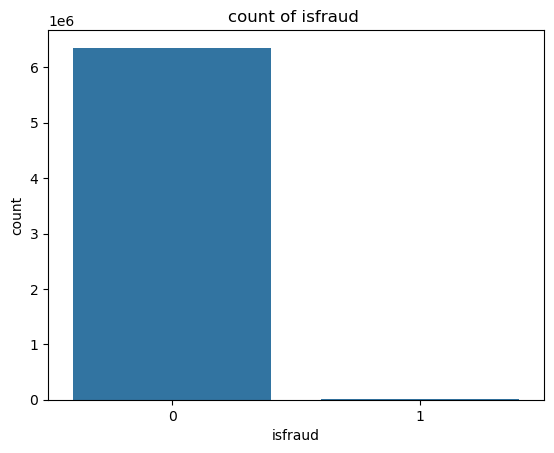

In [221]:
# visualize the fraud count
sns.countplot(x=online['isfraud'],data=online)
plt.title('count of isfraud ')
plt.show()

ValueError: x and y must have same first dimension, but have shapes (6362604,) and (9,)

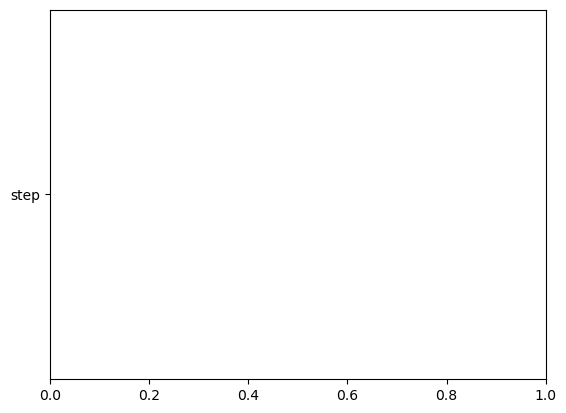

In [239]:
## we want to see which type of payment is fraud 
selected_features = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']

# Create subplots (number of subplots is equal to the number of selected features)
fig, axes = plt.subplots(1, len(selected_features), figsize=(20, 5))

# Loop through each selected feature to create individual bar plots
for i, feature in enumerate(selected_features):
    sns.barplot(x=data['isFraud'], y=data[feature], hue=data['isFraud'], ax=axes[i], palette="Set2")
    axes[i].set_title(f'{feature} vs isFraud')  # Title for each subplot
    axes[i].set_xlabel('isFraud') 
    axes[i].set_ylabel(feature)  

# Add a title for the overall figure and adjust layout for better spacing
plt.suptitle("Comparison of Selected Features with Target (Bar Plot)", fontsize=16)
plt.tight_layout()  
plt.show()  

In [ ]:
# Grab the value counts for the 'type' column to see the breakdown
value_counts = data['type'].value_counts()
print("Value Counts:\n", value_counts)

# Plot a count plot to visualize transaction type popularity
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='type', order=value_counts.index, palette='viridis')
plt.title('Count Plot of Transaction Types')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.show()
# Quick note: 0 = CASH_OUT, 1 = PAYMENT, 2 = CASH_IN, 3 = TRANSFER, 4 = DEBIT
# This should highlight which type’s most frequent—pretty handy for spotting trends!

In [ ]:
# Create a contingency table (cross-tabulation) between isFraud and type
contingency_table = pd.crosstab(data['isFraud'], data['type'])

# Plot heatmap for the contingency table
plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='Blues', cbar=False)

plt.title('Heatmap of isFraud vs Type')
plt.xlabel('Type')
plt.ylabel('isFraud')
plt.show()

# feature engineering

In [ ]:
# Define weights for transaction types (using numeric values)
transaction_type_weights = {
    0: 2.0,  # CASH_OUT
    1: 1.0,  # PAYMENT
    2: 1.0,  # CASH_IN
    3: 2.0, # TRANSFER 
    4: 1.0  # DEBIT
}

# Assign weights with a default value for missing categories
data['transaction_type_weight'] = data['type'].map(lambda x: transaction_type_weights.get(x, 1.0))

In [ ]:
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler


# Initialize scalers
robust_scaler = RobustScaler()
 
# Apply transformations
data['amount_scaled'] = robust_scaler.fit_transform(data[['amount']])

# Apply log transformation to prevent zero dominance
data['oldbalanceOrg_log'] = np.log1p(data['oldbalanceOrg'])
data['newbalanceOrig_log'] = np.log1p(data['newbalanceOrig'])
data['oldbalanceDest_log'] = np.log1p(data['oldbalanceDest'])
data['newbalanceDest_log'] = np.log1p(data['newbalanceDest'])

# Check scaled data
print(data[['amount_scaled', 'oldbalanceOrg_log', 'newbalanceOrig_log',
                        'oldbalanceDest_log', 'newbalanceDest_log']].describe())

In [ ]:
# Define amount bins and labels
bins = [0, 100, 500, 1000, 5000, 10000, 50000, 100000, 1000000, float('inf')]
labels = ['0-100', '100-500', '500-1K', '1K-5K', '5K-10K', '10K-50K', '50K-100K', '100K+', '1000K+']

# Bin the transaction amounts
data['amount_bin'] = pd.cut(data['amount'], bins=bins, labels=labels)

# Calculate fraud rate per bin (in a separate DataFrame)
fraud_rate = data.groupby('amount_bin')['isFraud'].agg(['count', 'sum']).rename(
    columns={'count': 'Total Transactions', 'sum': 'Fraudulent Transactions'}
)
fraud_rate['Fraud Rate'] = fraud_rate['Fraudulent Transactions'] / fraud_rate['Total Transactions']

# Reset index for readability
fraud_rate = fraud_rate.reset_index()

# Display fraud rate per bin
print("Fraud Rate per Bin:")
print(fraud_rate)

In [ ]:
# Define weights for each transaction amount bin
bin_weights = {
    '0-100': 1.0,
    '100-500': 1.0,
    '500-1K': 1.0,
    '1K-5K': 1.0,
    '5K-10K': 1.0,
    '10K-50K': 1.0,
    '50K-100K': 1.0,
    '100K+': 1.5,
    '1000K+': 2.0
}

# Assign bin weights to the data DataFrame
data['bin_weight'] = data['amount_bin'].map(lambda x: bin_weights.get(x, 1.0))

In [ ]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='isFraud', y='amount_scaled', data=data, palette='Set2', inner='quartile')

plt.title("Transaction Amount Distribution: Fraud vs. Non-Fraud")
plt.xlabel("Fraud (0 = No, 1 = Yes)")
plt.ylabel("Log-Scaled Transaction Amount")
plt.ylim(0, 100)
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.barplot(x='amount_bin', y='Fraud Rate', data=fraud_rate, palette='coolwarm')

plt.title('Fraud Rate by Transaction Amount')
plt.xlabel('Transaction Amount Range')
plt.ylabel('Fraud Rate')
plt.xticks(rotation=45)
plt.show()

In [ ]:
data.head(30)

In [ ]:
import warnings

# Suppress FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# KDE plot for non-fraudulent transactions
sns.kdeplot(data=data[data['isFraud'] == 0], 
            x='oldbalanceOrg_log', label='Non-Fraud', fill=True, color='blue')

# KDE plot for fraudulent transactions
sns.kdeplot(data=data[data['isFraud'] == 1], 
            x='oldbalanceOrg_log', label='Fraud', fill=True, color='red')

# Add labels and title
plt.xlabel("Log of Old Balance")
plt.ylabel("Density")
plt.title("Distribution of Log Old Balance for Fraud & Non-Fraud Transactions")
plt.legend()
plt.show()

In [ ]:
# KDE plot for non-fraudulent transactions
sns.kdeplot(data=data[data['isFraud'] == 0], 
            x='newbalanceOrig_log', label='Non-Fraud', fill=True, color='blue')

# KDE plot for fraudulent transactions
sns.kdeplot(data=data[data['isFraud'] == 1], 
            x='newbalanceOrig_log', label='Fraud', fill=True, color='red')

# Add labels and title
plt.xlabel("Log of New Balance")
plt.ylabel("Density")
plt.title("Distribution of Log New Balance for Fraud & Non-Fraud Transactions")
plt.legend()
plt.show()

In [ ]:
# KDE plot for non-fraudulent transactions
sns.kdeplot(data=data[data['isFraud'] == 0], 
            x='oldbalanceDest_log', label='Non-Fraud', fill=True, color='blue')

# KDE plot for fraudulent transactions
sns.kdeplot(data=data[data['isFraud'] == 1], 
            x='oldbalanceDest_log', label='Fraud', fill=True, color='red')

# Add labels and title
plt.xlabel("Log of Old Balance (Receiver)")
plt.ylabel("Density")
plt.title("Distribution of Log Old Balance for Fraud & Non-Fraud Transactions (Receiver)")
plt.legend()
plt.show()

In [ ]:
# Set figure size
plt.figure(figsize=(8, 6))

# KDE plot for non-fraudulent transactions
sns.kdeplot(data=data[data['isFraud'] == 0], 
            x='newbalanceDest_log', label='Non-Fraud', fill=True, color='blue')

# KDE plot for fraudulent transactions
sns.kdeplot(data=data[data['isFraud'] == 1], 
            x='newbalanceDest_log', label='Fraud', fill=True, color='red')

# Add labels and title
plt.xlabel("Log of New Balance (Receiver)")
plt.ylabel("Density")
plt.title("Distribution of Log New Balance for Fraud & Non-Fraud Transactions (Receiver)")
plt.legend()
plt.show()

In [ ]:
# Combine weights
data['combined_weight'] = data['transaction_type_weight'] * data['bin_weight']

In [ ]:
from sklearn.impute import SimpleImputer
# Initialize SimpleImputer with strategy='median'
imputer = SimpleImputer(strategy='median')

# Apply imputer to specific columns
data[['oldbalanceOrg','oldbalanceDest','newbalanceOrig','newbalanceDest']] = imputer.fit_transform(data[['oldbalanceOrg','oldbalanceDest','newbalanceOrig','newbalanceDest']])

In [ ]:
data['balance_diff_Org'] = data['oldbalanceOrg'] - data['newbalanceOrig']
data['balance_diff_Dest']= data['oldbalanceDest'] - data['newbalanceDest']

In [ ]:
data['balance_diff_Org_log'] = np.log1p(data['balance_diff_Org'])  # Log(x+1) for non-negative values
data['balance_diff_Dest_log'] = np.log1p(data['balance_diff_Dest'])

In [ ]:
# Replace infinite values with NaN to handle potential errors
data.replace([np.inf, -np.inf], np.nan, inplace=True)

# Define columns to scale (only those that exist)
columns_to_scale = [
    'balance_diff_Org_log',
    'balance_diff_Dest_log',
    'balance_diff_Org'
]

# Ensure all columns exist before scaling
columns_to_scale = [col for col in columns_to_scale if col in data.columns]

# Initialize RobustScaler
scaler = RobustScaler()

# Apply scaling only to existing columns
data[columns_to_scale] = scaler.fit_transform(data[columns_to_scale])

# Display the first few rows of scaled data
print("Scaling complete. First few rows of scaled data:")
print(data.head())

In [ ]:
# Scatter plot of Amount vs Balance Difference
sns.scatterplot(x='amount', y='balance_diff_Org', hue='isFraud', data=data, alpha=0.5)

# Add titles and labels
plt.title('Amount vs Balance Difference (Origin Account)')
plt.xlabel('Transaction Amount')
plt.ylabel('Balance Difference (Old - New)')
plt.show()


In [ ]:
# Scatter plot of Amount vs Destination Balance Difference
sns.scatterplot(x='amount', y='balance_diff_Dest', hue='isFraud', data=data, alpha=0.5)

# Add titles and labels
plt.title('Amount vs Balance Difference (Destination Account)')
plt.xlabel('Transaction Amount')
plt.ylabel('Balance Difference (Old - New)')
plt.show()

In [ ]:
# Drop irrelevant columns and original variables
columns_to_drop = ['step','amount','oldbalanceOrg','newbalanceOrig','newbalanceDest','oldbalanceDest','isFlaggedFraud','transaction_type_weight','bin_weight','amount_bin',"nameOrig","nameDest" ]

# Drop the specified columns
data = data.drop(columns=columns_to_drop)

# Check  the remaining columns
print(data.head())

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = data.select_dtypes(include=[np.number]).corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

In [ ]:
columns_to_drop = [ 'balance_diff_Dest','balance_diff_Dest_log','balance_diff_Org_log','newbalanceDest_log']
       

# Drop the specified columns
data = data.drop(columns=columns_to_drop)

# Check the updated DataFrame
print(data.head())

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Grab the numerical columns we want to check for multicollinearity
X = data[['amount_scaled', 'oldbalanceOrg_log', 'newbalanceOrig_log', 'oldbalanceDest_log', 'balance_diff_Org']]

# Set up a DataFrame to store the VIF results
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns  # List the features we're checking
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]  # Calculate VIF for each feature

# Show the VIF results to see which features might be too correlated
print(vif_data)

In [ ]:
# List the column we want to drop because it's too correlated with others
columns_to_drop = ['oldbalanceOrg_log']

# Drop the column from the dataset
data = data.drop(columns=columns_to_drop)

# Take a quick look at the updated dataset to make sure the column is gone
print(data.head())

In [ ]:
print(data.columns)

In [ ]:
data

In [ ]:
# Import necessary libraries
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier  # Using SGDClassifier for faster training
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
import numpy as np
import pandas as pd

# Separate features (X) and target (y), but keep 'combined_weight' for now
X = data.drop(columns=['isFraud'])  # Features (excluding the target)
y = data['isFraud']  # Target variable

# Downsample the majority class to reduce dataset size (optional, adjust sampling_strategy)
rus = RandomUnderSampler(sampling_strategy=0.1, random_state=42)  # Keep 10% of the majority class
X_under, y_under = rus.fit_resample(X, y)

# Apply SMOTE to balance classes (optimized with k_neighbors=1 for speed)
smote = SMOTE(sampling_strategy=0.5, k_neighbors=1, random_state=42)  # Balance classes
X_resampled, y_resampled = smote.fit_resample(X_under, y_under)

# Separate 'combined_weight' from the features
combined_weight_resampled = X_resampled['combined_weight']  # Extract sample weights
X_resampled = X_resampled.drop(columns=['combined_weight'])  # Drop weights from features

# Convert to NumPy arrays for faster processing
X_resampled, y_resampled = X_resampled.values, y_resampled.values

# Single stratified train-test split
X_train, X_test, y_train, y_test, weights_train, weights_test = train_test_split(
    X_resampled, y_resampled, combined_weight_resampled,
    test_size=0.2,  # 20% for testing
    stratify=y_resampled,  # Preserve class balance
    random_state=42  # For reproducibility
)

# Define a faster model (SGDClassifier with log loss for logistic regression)
model = SGDClassifier(
    loss='log_loss',  # Equivalent to logistic regression
    penalty='l1',  # L1 regularization for feature selection
    alpha=0.0001,  # Regularization strength
    max_iter=1000,  # Maximum iterations
    tol=1e-3,  # Tolerance for stopping
    random_state=42,  # For reproducibility
    n_jobs=-1  # Use all CPU cores for faster training
)

# Train the model with sample weights
model.fit(X_train, y_train, sample_weight=weights_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)  # Calculate accuracy
report = classification_report(y_test, y_pred)  # Generate classification report
conf_matrix = confusion_matrix(y_test, y_pred)  # Generate confusion matrix

# Print results
print(f" Accuracy: {accuracy:.4f}")
print("\n Classification Report:\n", report)
print("\n Confusion Matrix:\n", conf_matrix)